In [1]:
import pandas as pd
import numpy as np

In [3]:
#Scale data

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('combined_data3.csv', index_col = 0)

X = data.drop(["Vote16"], axis = 1)
y = data["Vote16"]

scaler = StandardScaler()

scaler.fit(X)
X_std = scaler.transform(X)

In [4]:
#Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.25, random_state = 1337)

In [13]:
#Define Model

from tensorflow import keras
from tensorflow.keras import layers, callbacks

col_len = len(X.columns)
batch = 512
drop = .30

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,                                             #Minimium amount of change to count as an improvement
    patience=50,                                                 #How many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(batch, activation='relu', input_shape=[col_len]),
    layers.Dropout(drop),                                        #Dropout addresses overfitting
    layers.BatchNormalization(),                                 #Normalization addresses optimization process, can improve predictive accuracy
    layers.Dense(batch, activation='relu'),
    layers.Dropout(drop),
    layers.BatchNormalization(),
    layers.Dense(batch, activation='relu'),
    layers.Dropout(drop),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'sigmoid'),                     #Remove this activation for regressive tasks
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',                                  #Change to MAE for regressive tasks
    metrics=['binary_accuracy'],                                 #Remove this for regressive tasks
)

In [14]:
trained_model = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 256,                                            #Batch size changes loss; its a balance between val_loss and loss
    epochs = 1000,
    callbacks = [early_stopping],
    verbose = 0,
)

Minimum validation loss: 0.5413994193077087
Maximum accuracy: 0.7342419028282166


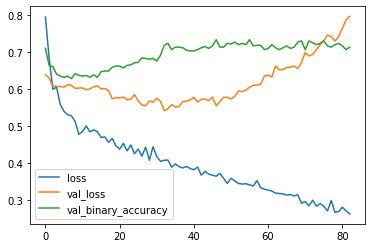

In [15]:
#Convert the training history to a dataframe and plot
history_df = pd.DataFrame(trained_model.history)
history_df.loc[:, ['loss', 'val_loss', 'val_binary_accuracy']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
print("Maximum accuracy: {}".format(history_df['val_binary_accuracy'].max()))